In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix
from keras.optimizers import Adam
import itertools



['dog vs cat']


Using TensorFlow backend.


In [2]:
print(os.listdir('../input/dog vs cat/dataset'))
path = '../input/dog vs cat/dataset/'

['training_set', 'test_set']


In [3]:
train_path = path+'training_set'
test_path = path+'test_set'

In [4]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),
                                                        classes=['dogs','cats'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),
                                                        classes=['dogs','cats'],batch_size=10)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
imgs, labels = next(train_batches)

/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


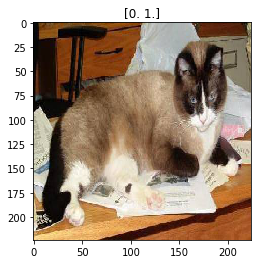

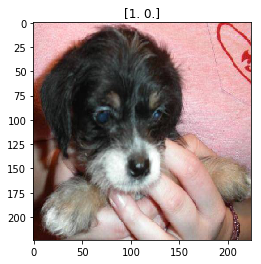

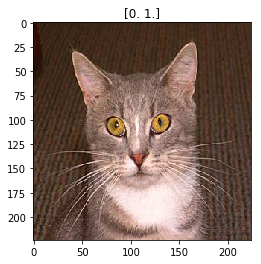

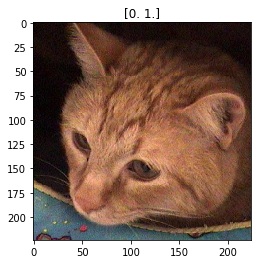

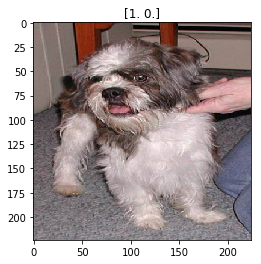

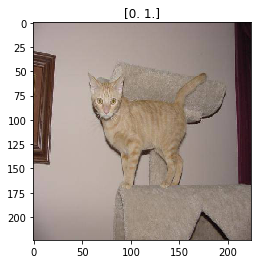

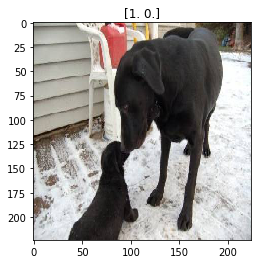

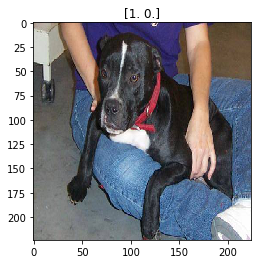

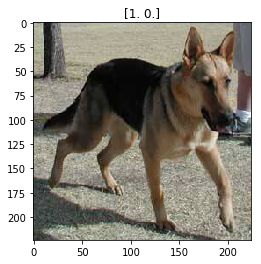

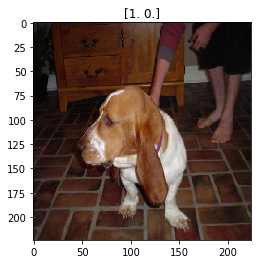

In [6]:
for i in range(len(labels)):
    plt.figure()
    plt.imshow(np.asarray(imgs[i])/255.0)
    plt.title(labels[i])

In [8]:
vgg16_model = keras.applications.vgg16.VGG16()


553467904/553467096 [==============================] - 6s 0us/step


In [7]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),
                                                        classes=['dogs','cats'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),
                                                        classes=['dogs','cats'],batch_size=10)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
vgg16_model.layers.pop()

In [10]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
num_classes = 2

my_new_model = Sequential()
my_new_model.add(vgg16_model)
my_new_model.add(Dense(num_classes, activation='softmax'))

# Indicate whether the first layer should be trained/changed or not.
my_new_model.layers[0].trainable = False

In [12]:
my_new_model.compile(optimizer='sgd', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

In [13]:
my_new_model.fit_generator(train_batches, steps_per_epoch=800)

Epoch 1/1
800/800 [==============================] - 55s 69ms/step - loss: 0.6594 - acc: 0.7587


In [14]:
my_new_model.evaluate_generator(test_batches, steps=200)

[0.6252469450235367, 0.8684999924898148]

In [15]:
test_data, test_labels= next(test_batches)
test_labels

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [16]:
preds = my_new_model.predict(test_data)
preds

array([[0.46766695, 0.5323331 ],
       [0.51159334, 0.4884067 ],
       [0.51478374, 0.48521623],
       [0.41742852, 0.5825715 ],
       [0.5382967 , 0.46170327],
       [0.5166234 , 0.48337665],
       [0.5253734 , 0.47462654],
       [0.48440713, 0.5155929 ],
       [0.5351366 , 0.46486342],
       [0.5319491 , 0.4680509 ]], dtype=float32)

In [17]:
for i in test_labels:
    print(np.argmax(i))

1
0
0
1
0
0
1
1
0
0


In [18]:
for i in preds:
    print(np.argmax(i))

1
0
0
1
0
0
0
1
0
0
